#### Import packages

In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np

#### Load stories

In [2]:
df_t = pd.read_csv('goodreads_scores.csv')

In [3]:
df_t.head()

,Story,Av_Score,Character Development,Emotional Flexibility,Language Proficiency & Literary Devices,Narrative Ending,Narrative Pacing,Originality in Form & Structure,Originality in Thought,Originality of Theme and Content,Perspective & Voice Flexibility,Rhetorical Complexity,Scene vs. Exposition,Structural Flexibility,Understandability & Coherence,World-Building and Setting
0,The Wicked Prince,2.930000,0,0,3,3,2,0,1,1,0,2,1,1,3,1
1,Hermann the Irascible,3.000000,0,1,3,3,3,2,3,3,1,3,1,3,3,1
2,The Little Match Girl,4.079656,1,1,3,3,3,0,3,3,1,3,1,1,3,3
3,An Uncomfortable Bed,3.240000,1,1,2,3,3,0,3,3,0,3,1,3,3,2
4,The Stranger,3.230000,2,3,3,3,3,2,3,3,2,3,3,3,3,3


#### Scale scores and train model

In [4]:
# Split data into features and target
X = df_t.drop(columns=["Av_Score","Story"]).values
y = df_t["Av_Score"].values

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create MLP
mlp = MLPRegressor(hidden_layer_sizes=(7,),
                   activation="relu",
                   solver="adam",
                   max_iter=5000,
                   random_state=7)

# 5-fold cross validation, using negative MSE
ratings = cross_val_score(mlp, X, y, cv=5, scoring="neg_mean_squared_error")
rmse_scores = (-ratings) ** 0.5

print("Cross-validation RMSEs:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))


Cross-validation RMSEs: [0.8236722  0.72243192 0.73010962 0.95152363 0.65455612]
Mean RMSE: 0.7764586971318732


#### Fit MLP and find the importance of features

In [ ]:
mlp.fit(X,y)

result = permutation_importance(
    mlp, X, y, 
    n_repeats=20, random_state=42, n_jobs=-1,
    scoring="neg_mean_squared_error"
)

importance_df = pd.DataFrame({
    "feature": df_t.drop(columns=["Av_Score","Story"]).columns,
    "importance_mean": result.importances_mean,
    "importance_std": result.importances_std
}).sort_values("importance_mean", ascending=False)

print(importance_df)


#### Show importance

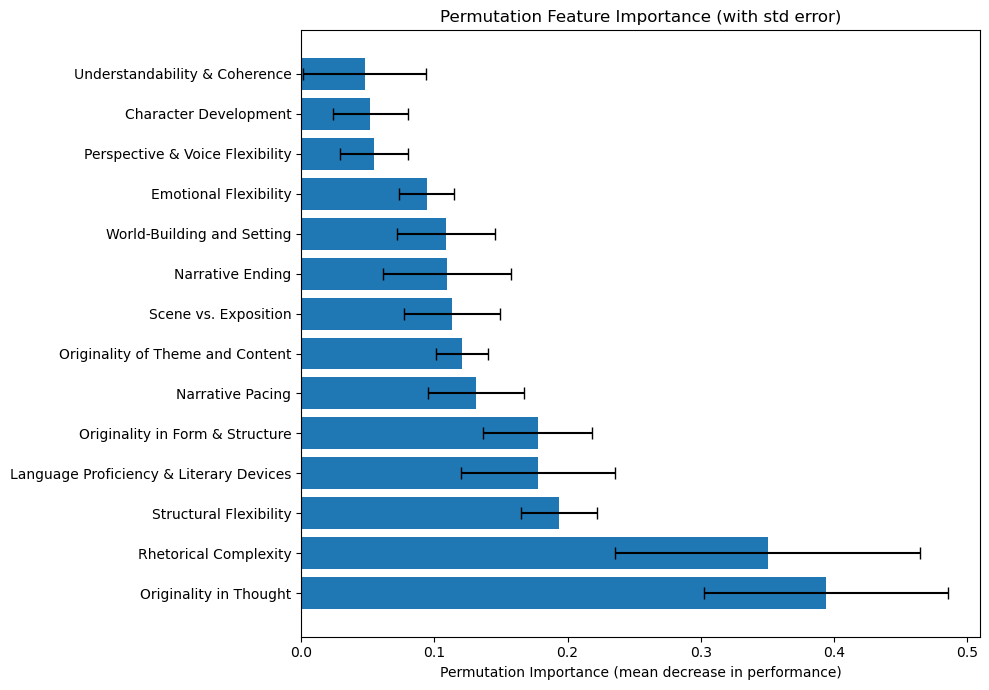

In [6]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 7))
plt.barh(
    importance_df["feature"], 
    importance_df["importance_mean"], 
    xerr=importance_df["importance_std"], 
    capsize=4
)
plt.xlabel("Permutation Importance (mean decrease in performance)")
plt.title("Permutation Feature Importance (with std error)")
plt.tight_layout()
plt.show()


#### Make it alphebetical

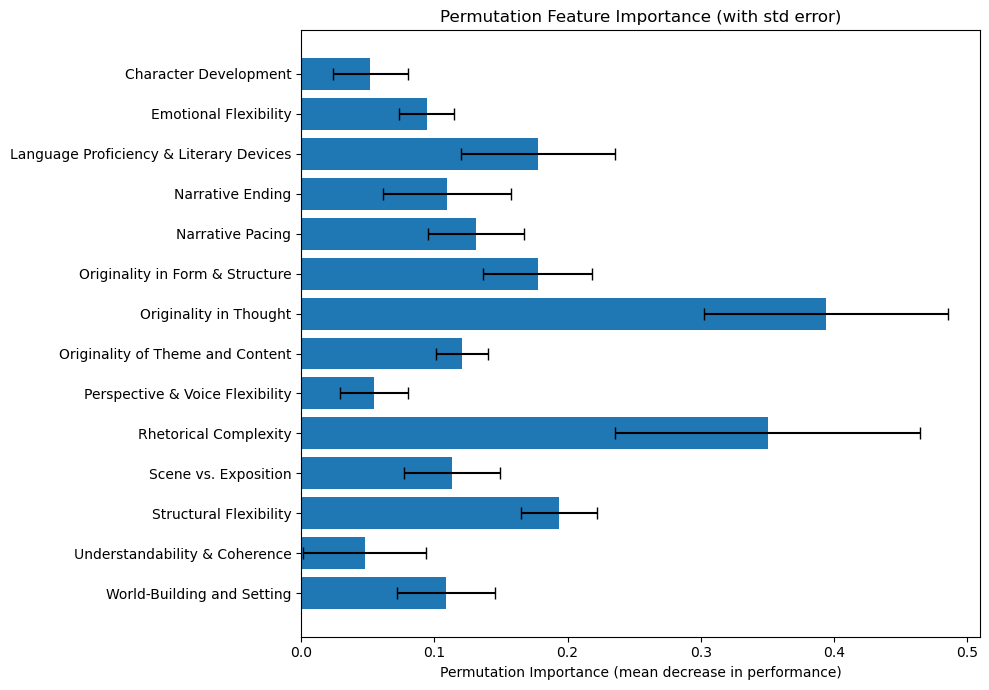

In [9]:
alph = importance_df.sort_values("feature", ascending=False)

# Plot
plt.figure(figsize=(10, 7))
plt.barh(
    alph["feature"], 
    alph["importance_mean"], 
    xerr=alph["importance_std"], 
    capsize=4
)
plt.xlabel("Permutation Importance (mean decrease in performance)")
plt.title("Permutation Feature Importance (with std error)")
plt.tight_layout()
plt.show()

In [18]:
compare = pd.DataFrame(y)
compare['prediction']=mlp.predict(X)

In [19]:
compare.to_csv('predvsreal.csv')